In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
sns.set()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
os.chdir("/Users/serrauzun/Desktop/MSDS_422_Practical")

In [4]:
df = pd.read_csv('HMEQ_Loss.csv')

1. TARGET_BAD_FLAG: If Bad = 1
2. TARGET_LOSS_AMT: If loan was Bad, this was the amount not repaid. 
3. LOAN: HMEQ Credit Line
4. MORTDUE: Current Outstanding Mortgage Balance
5. VALUE: Value of your house
6. REASON: Why do you want a loan?
7. JOB: What do you do for a living?
8. YOJ: Years on Job
9. DEROG: Derogatory Marks on Credit Record. These are very bad things that stay on your      credit report for 7 years.
10. DELINQ: Delinquencies on your current credit report. This refers to the number of times     you were overdue when paying bills in the last three years.
11. CLAGE: Credit Line Age (in months) is how long you have had credit.
12. NINQ: Number of inquiries. This is the number of times within the last 3 years that you     went out looking for credit
13. CLNO: Number of credit lines you have
14. DEBTINC: Debt to Income Ratio. Take the money you spend every month and divide it by       the amount of money you earn every month.

In [5]:
list(df.columns)

['TARGET_BAD_FLAG',
 'TARGET_LOSS_AMT',
 'LOAN',
 'MORTDUE',
 'VALUE',
 'REASON',
 'JOB',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [6]:
list(df.columns)

['TARGET_BAD_FLAG',
 'TARGET_LOSS_AMT',
 'LOAN',
 'MORTDUE',
 'VALUE',
 'REASON',
 'JOB',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [7]:
df = df.drop_duplicates(keep='first')
df.shape

(5960, 14)

Note: There are no duplicate rows in the dataset

--

In [8]:
df.head()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [9]:
TARGET_B = "TARGET_BAD_FLAG"
TARGET_L = "TARGET_LOSS_AMT"

In [10]:
print(df.head().T)

                       0        1        2     3        4
TARGET_BAD_FLAG  1        1        1        1     0      
TARGET_LOSS_AMT  641      1109     767      1425  NaN    
LOAN             1100     1300     1500     1500  1700   
MORTDUE          25860    70053    13500    NaN   97800  
VALUE            39025    68400    16700    NaN   112000 
REASON           HomeImp  HomeImp  HomeImp  NaN   HomeImp
JOB              Other    Other    Other    NaN   Office 
YOJ              10.5     7        4        NaN   3      
DEROG            0        0        0        NaN   0      
DELINQ           0        2        0        NaN   0      
CLAGE            94.3667  121.833  149.467  NaN   93.3333
NINQ             1        0        1        NaN   0      
CLNO             9        14       10       NaN   14     
DEBTINC          NaN      NaN      NaN      NaN   NaN    


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5960 entries, 0 to 5959
Data columns (total 14 columns):
TARGET_BAD_FLAG    5960 non-null int64
TARGET_LOSS_AMT    1189 non-null float64
LOAN               5960 non-null int64
MORTDUE            5442 non-null float64
VALUE              5848 non-null float64
REASON             5708 non-null object
JOB                5681 non-null object
YOJ                5445 non-null float64
DEROG              5252 non-null float64
DELINQ             5380 non-null float64
CLAGE              5652 non-null float64
NINQ               5450 non-null float64
CLNO               5738 non-null float64
DEBTINC            4693 non-null float64
dtypes: float64(10), int64(2), object(2)
memory usage: 698.4+ KB


In [12]:
dt = df.dtypes
print(dt)

TARGET_BAD_FLAG    int64  
TARGET_LOSS_AMT    float64
LOAN               int64  
MORTDUE            float64
VALUE              float64
REASON             object 
JOB                object 
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
dtype: object


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET_BAD_FLAG,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
TARGET_LOSS_AMT,1189.0,13414.576955,10839.455965,224.000000,5639.000000,11003.000000,17634.000000,78987.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000


In [14]:
objList = []
intList = []
floatList = [] 

for i in dt.index:
    print("here is", i, "and here is the type", dt[i])
    if i in ([TARGET_B, TARGET_L]):continue    
    if dt[i] in (["object"]):objList.append(i)    
    if dt[i] in (["float64"]):floatList.append(i)    
    if dt[i] in (["int64"]):intList.append(i)

here is TARGET_BAD_FLAG and here is the type int64
here is TARGET_LOSS_AMT and here is the type float64
here is LOAN and here is the type int64
here is MORTDUE and here is the type float64
here is VALUE and here is the type float64
here is REASON and here is the type object
here is JOB and here is the type object
here is YOJ and here is the type float64
here is DEROG and here is the type float64
here is DELINQ and here is the type float64
here is CLAGE and here is the type float64
here is NINQ and here is the type float64
here is CLNO and here is the type float64
here is DEBTINC and here is the type float64


In [15]:
print(" OBJECTS ")
print(" ------- ")
for i in objList :    
    print(i)

print(" INTEGER ")
print(" ------- ")
for i in intList :
    print(i)

print(" FLOAT ")
print(" ----- ")
for i in floatList :
    print(i)

 OBJECTS 
 ------- 
REASON
JOB
 INTEGER 
 ------- 
LOAN
 FLOAT 
 ----- 
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC


In [16]:
list(df['REASON'].unique())

['HomeImp', nan, 'DebtCon']

List of REASONS
1. HomeImp
2. DebtCon
3. NaN

In [17]:
list(df['JOB'].unique())

['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self']

List of JOBS
1. Other
2. Office
3. Sales
4. Mgr
5. ProfExe
6. Self
7. NaN

In [18]:
for i in objList :
    print("Class = ", i)
    g = df.groupby(i)
    print(g[i].count())
    x = g[TARGET_B].mean()
    print("Default Prob", x)
    print(" .................")
    x = g[TARGET_L].mean()
    print("Loss Amount",x)
    print("===============\n\n\n ")

Class =  REASON
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Default Prob REASON
DebtCon    0.189664
HomeImp    0.222472
Name: TARGET_BAD_FLAG, dtype: float64
 .................
Loss Amount REASON
DebtCon    16005.163758
HomeImp    8388.090909 
Name: TARGET_LOSS_AMT, dtype: float64


 
Class =  JOB
JOB
Mgr        767 
Office     948 
Other      2388
ProfExe    1276
Sales      109 
Self       193 
Name: JOB, dtype: int64
Default Prob JOB
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
 .................
Loss Amount JOB
Mgr        14141.536313
Office     13475.304000
Other      11570.102888
ProfExe    14660.966981
Sales      16421.447368
Self       22232.362069
Name: TARGET_LOSS_AMT, dtype: float64


 


There are more loans taken for Debt Consolidation than Home Improvement, 3928 and 1780, respectively. The default probability for loans taken for Home Improvement is approximately 4% higher than loans taken for Debt Consolidation, while in case of loan default, the loss almost by loans taken for Debt Consolidation is almost twice as high as loans taken for Home Improvements. In conclusion, we can see that there are more and bigger loans taken for Debt Consolidation than Home Improvement loans, yet they are less likely to get defaulted than Home Improvement loans. 

--------------------------- DATA IMPUTATION ---------------------------

In [19]:
df.isna().sum()

TARGET_BAD_FLAG    0   
TARGET_LOSS_AMT    4771
LOAN               0   
MORTDUE            518 
VALUE              112 
REASON             252 
JOB                279 
YOJ                515 
DEROG              708 
DELINQ             580 
CLAGE              308 
NINQ               510 
CLNO               222 
DEBTINC            1267
dtype: int64

In [20]:
mortdue_median = df['MORTDUE'].median()
df['MORTDUE'].fillna(mortdue_median, inplace=True)

In [21]:
value_median = df['VALUE'].median()
df['VALUE'].fillna(value_median, inplace=True)

In [22]:
yoj_median = df['YOJ'].median()
df['YOJ'].fillna(yoj_median, inplace=True)

In [23]:
derog_median = df['DEROG'].median()
df['DEROG'].fillna(derog_median, inplace=True)

In [24]:
delinq_median = df['DELINQ'].median()
df['DELINQ'].fillna(delinq_median, inplace=True)

In [25]:
clage_median = df['CLAGE'].median()
df['CLAGE'].fillna(clage_median, inplace=True)

In [26]:
ninq_median = df['NINQ'].median()
df['NINQ'].fillna(ninq_median, inplace=True)

In [27]:
clno_median = df['CLNO'].median()
df['CLNO'].fillna(clno_median, inplace=True)

Now we will place '0' where there is a missing value in TARGET_LOSS_AMT and DEBTINC

In [28]:
zero = 0
df['TARGET_LOSS_AMT'].fillna(zero, inplace=True)
df['DEBTINC'].fillna(zero, inplace=True)

Now we will replace NAs in REASON and JOB with 'Missing'

In [29]:
missing_text = "Missing"
df['REASON'].fillna(missing_text, inplace=True)
df['JOB'].fillna(missing_text, inplace=True)

Checking the # of NAs in each variable we now see that we imputated all missing data in the dataset

In [30]:
df.isna().sum()

TARGET_BAD_FLAG    0
TARGET_LOSS_AMT    0
LOAN               0
MORTDUE            0
VALUE              0
REASON             0
JOB                0
YOJ                0
DEROG              0
DELINQ             0
CLAGE              0
NINQ               0
CLNO               0
DEBTINC            0
dtype: int64

In [31]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
TARGET_BAD_FLAG,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0
TARGET_LOSS_AMT,641,1109,767,1425,0,335,1841,373,1217,1523,1822,1224,1928,0,1680,407,2375,224,2017,0
LOAN,1100,1300,1500,1500,1700,1700,1800,1800,2000,2000,2000,2000,2000,2000,2100,2200,2200,2200,2300,2300
MORTDUE,25860,70053,13500,65019,97800,30548,48649,28502,32700,65019,22608,20627,45000,64536,71000,24280,90957,23030,28192,102370
VALUE,39025,68400,16700,89235.5,112000,40320,57037,43034,46740,62250,89235.5,29800,55000,87400,83850,34687,102600,89235.5,40150,120953
REASON,HomeImp,HomeImp,HomeImp,Missing,HomeImp,HomeImp,HomeImp,HomeImp,HomeImp,HomeImp,Missing,HomeImp,HomeImp,Missing,HomeImp,HomeImp,HomeImp,Missing,HomeImp,HomeImp
JOB,Other,Other,Other,Missing,Office,Other,Other,Other,Other,Sales,Missing,Office,Other,Mgr,Other,Other,Mgr,Missing,Other,Office
YOJ,10.5,7,4,7,3,9,5,11,3,16,18,11,3,2.5,8,7,7,19,4.5,2
DEROG,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,0,0
DELINQ,0,2,0,0,0,0,2,0,2,0,0,1,0,0,1,1,6,0,0,0


In [32]:
j = df.groupby("JOB")
i = "MORTDUE"
print(j[i].median())

JOB
Mgr        75142.0
Missing    65019.0
Office     64712.0
Other      58921.5
ProfExe    82018.0
Sales      70546.0
Self       84333.0
Name: MORTDUE, dtype: float64


Visuals

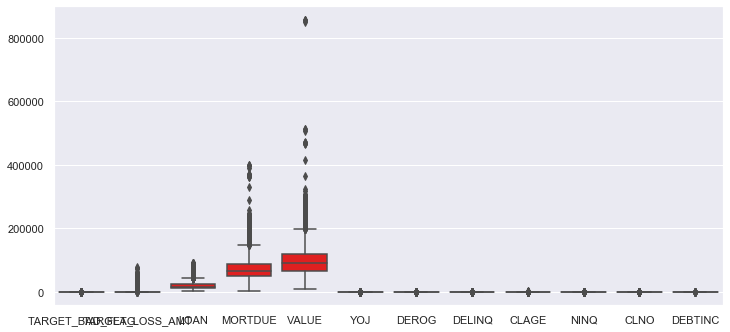

In [33]:
plt.figure(figsize=(12,5.5))
bxplt = sns.boxplot(data=df, color='red')

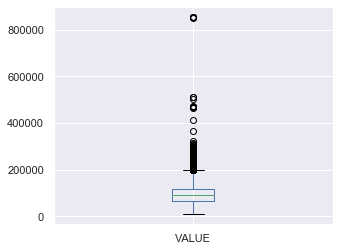

In [34]:
plt.figure(figsize=(5,4))
boxplot_value = df.boxplot(column=['VALUE'])

In [35]:
q_hi_v  = df["VALUE"].quantile(0.99)
q_hi_m  = df["MORTDUE"].quantile(0.99)

df_clean = df[(df["VALUE"] < q_hi_v) & (df["MORTDUE"] < q_hi_m)]

In [36]:
df_clean.shape

(5861, 14)

In [37]:
print("There were", len(df) - len(df_clean), "outliers that has been removed.")

There were 99 outliers that has been removed.


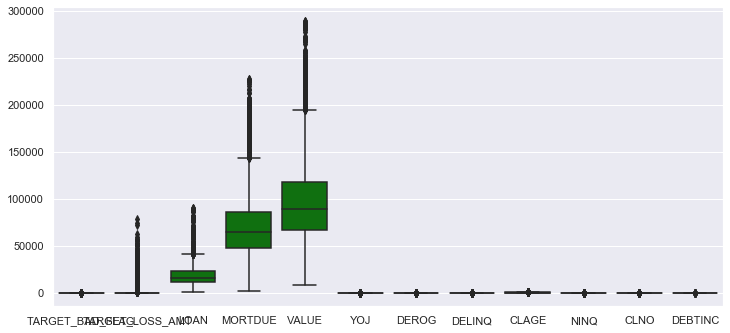

In [38]:
plt.figure(figsize=(12,5.5))
bxplt = sns.boxplot(data=df_clean, color='green')

In [39]:
df = df_clean

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET_BAD_FLAG,5861.0,0.198601,0.398981,0.0,0.000000,0.000000,0.000000,1.000000
TARGET_LOSS_AMT,5861.0,2607.528579,7040.238782,0.0,0.000000,0.000000,0.000000,78987.000000
LOAN,5861.0,18294.898481,10925.557580,1100.0,11000.000000,16100.000000,22900.000000,89900.000000
MORTDUE,5861.0,70234.565467,36058.418382,2063.0,47882.000000,65019.000000,86236.000000,228006.000000
VALUE,5861.0,98396.641280,46870.608247,8000.0,66379.000000,89235.500000,117650.000000,289430.000000
YOJ,5861.0,8.739473,7.215748,0.0,3.000000,7.000000,12.000000,41.000000
DEROG,5861.0,0.226241,0.804001,0.0,0.000000,0.000000,0.000000,10.000000
DELINQ,5861.0,0.403856,1.081892,0.0,0.000000,0.000000,0.000000,15.000000
CLAGE,5861.0,178.812196,83.665203,0.0,116.818648,173.466667,226.040295,1168.233561
NINQ,5861.0,1.157652,1.650645,0.0,0.000000,1.000000,2.000000,17.000000


In [41]:
num_bins_5 = 5
num_bins_10 = 10
num_bins_20 = 20

(array([ 259.,  871., 1273., 1181.,  874.,  693.,  255.,  118.,   93.,
          71.,   34.,   73.,    4.,   14.,   14.,    4.,    3.,   10.,
           5.,   12.]),
 array([ 1100.,  5540.,  9980., 14420., 18860., 23300., 27740., 32180.,
        36620., 41060., 45500., 49940., 54380., 58820., 63260., 67700.,
        72140., 76580., 81020., 85460., 89900.]),
 <a list of 20 Patch objects>)

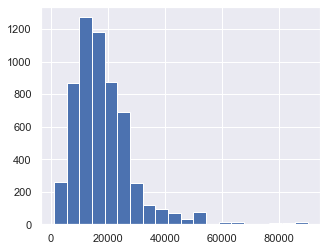

In [42]:
plt.figure(figsize=(5,4))
plt.hist(df['LOAN'],num_bins_20)

(array([ 147.,  323.,  390.,  569.,  816., 1270.,  640.,  462.,  375.,
         215.,  149.,  166.,  131.,   74.,   29.,   30.,   28.,   28.,
          10.,    9.]),
 array([  2063.  ,  13360.15,  24657.3 ,  35954.45,  47251.6 ,  58548.75,
         69845.9 ,  81143.05,  92440.2 , 103737.35, 115034.5 , 126331.65,
        137628.8 , 148925.95, 160223.1 , 171520.25, 182817.4 , 194114.55,
        205411.7 , 216708.85, 228006.  ]),
 <a list of 20 Patch objects>)

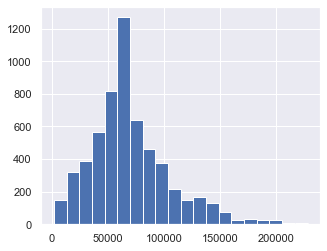

In [43]:
plt.figure(figsize=(5,4))
plt.hist(df['MORTDUE'],num_bins_20)

(array([ 34., 179., 408., 690., 921., 986., 739., 538., 312., 239., 155.,
        180., 158., 118.,  70.,  38.,  38.,  20.,  14.,  24.]),
 array([  8000. ,  22071.5,  36143. ,  50214.5,  64286. ,  78357.5,
         92429. , 106500.5, 120572. , 134643.5, 148715. , 162786.5,
        176858. , 190929.5, 205001. , 219072.5, 233144. , 247215.5,
        261287. , 275358.5, 289430. ]),
 <a list of 20 Patch objects>)

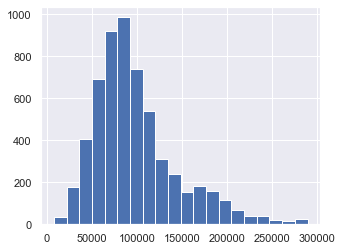

In [44]:
plt.figure(figsize=(5,4))
plt.hist(df['VALUE'],num_bins_20)

(array([1206.,  649.,  653., 1023.,  578.,  327.,  296.,  251.,  164.,
         174.,  135.,  154.,  104.,   65.,   53.,   12.,    4.,   10.,
           0.,    3.]),
 array([ 0.  ,  2.05,  4.1 ,  6.15,  8.2 , 10.25, 12.3 , 14.35, 16.4 ,
        18.45, 20.5 , 22.55, 24.6 , 26.65, 28.7 , 30.75, 32.8 , 34.85,
        36.9 , 38.95, 41.  ]),
 <a list of 20 Patch objects>)

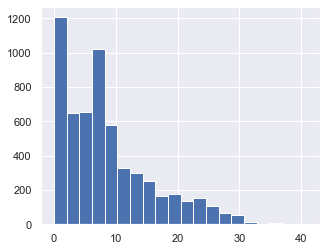

In [45]:
plt.figure(figsize=(5,4))
plt.hist(df['YOJ'],num_bins_20)

(array([1.466e+03, 3.049e+03, 1.202e+03, 1.170e+02, 7.000e+00, 1.800e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([   0.       ,  116.8233561,  233.6467122,  350.4700683,
         467.2934244,  584.1167805,  700.9401366,  817.7634927,
         934.5868488, 1051.4102049, 1168.233561 ]),
 <a list of 10 Patch objects>)

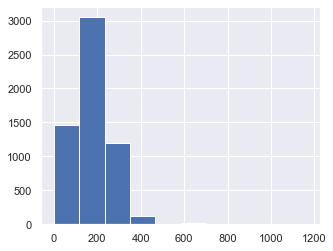

In [46]:
plt.figure(figsize=(5,4))
plt.hist(df['CLAGE'],num_bins_10)

Looking into correlation between variables 

In [47]:
df.corr()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
TARGET_BAD_FLAG,1.000000,0.744068,-0.087376,-0.062807,-0.078938,-0.056678,0.273253,0.353000,-0.163029,0.173218,0.002712,-0.425185
TARGET_LOSS_AMT,0.744068,1.000000,0.184098,0.043684,0.066005,-0.034359,0.259826,0.389406,-0.118054,0.182860,0.147447,-0.338866
LOAN,-0.087376,0.184098,1.000000,0.136439,0.292109,0.098170,0.013219,-0.031526,0.082728,0.031095,0.059895,0.121120
MORTDUE,-0.062807,0.043684,0.136439,1.000000,0.849750,-0.085691,-0.043706,-0.003109,0.114029,-0.008554,0.310707,0.121921
VALUE,-0.078938,0.066005,0.292109,0.849750,1.000000,-0.013429,-0.043331,0.008100,0.173174,-0.024391,0.308629,0.112516
YOJ,-0.056678,-0.034359,0.098170,-0.085691,-0.013429,1.000000,-0.057433,0.057823,0.192780,-0.056380,0.042632,-0.012257
DEROG,0.273253,0.259826,0.013219,-0.043706,-0.043331,-0.057433,1.000000,0.173718,-0.079793,0.149153,0.053110,-0.150155
DELINQ,0.353000,0.389406,-0.031526,-0.003109,0.008100,0.057823,0.173718,1.000000,0.023797,0.057892,0.157073,-0.190384
CLAGE,-0.163029,-0.118054,0.082728,0.114029,0.173174,0.192780,-0.079793,0.023797,1.000000,-0.118040,0.228013,0.057798
NINQ,0.173218,0.182860,0.031095,-0.008554,-0.024391,-0.056380,0.149153,0.057892,-0.118040,1.000000,0.076206,-0.076028


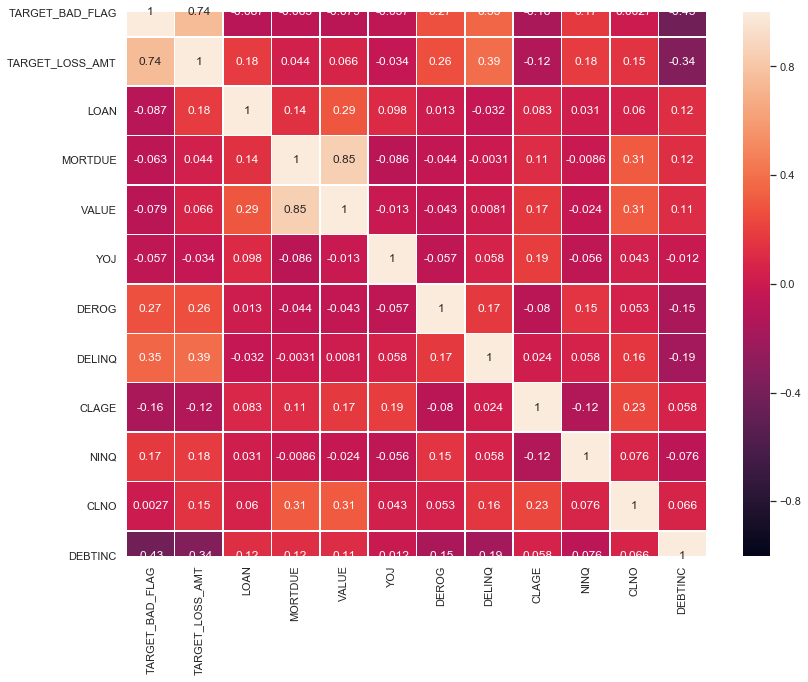

In [48]:
plt.figure(figsize=(13,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, vmin=-1, vmax=1, linewidths=.5)
plt.show()

--------------------------- ONE HOT ENCODING ---------------------------

In [49]:
df_REASON = pd.get_dummies(df.REASON, prefix='REASON')
print(df_REASON.head())

   REASON_DebtCon  REASON_HomeImp  REASON_Missing
0  0               1               0             
1  0               1               0             
2  0               1               0             
3  0               0               1             
4  0               1               0             


In [50]:
df = df.drop('REASON',axis = 1)
df = df.join(df_REASON)

In [51]:
df_JOB = pd.get_dummies(df.JOB, prefix='JOB')
print(df_JOB.head())

   JOB_Mgr  JOB_Missing  JOB_Office  JOB_Other  JOB_ProfExe  JOB_Sales  \
0  0        0            0           1          0            0           
1  0        0            0           1          0            0           
2  0        0            0           1          0            0           
3  0        1            0           0          0            0           
4  0        0            1           0          0            0           

   JOB_Self  
0  0         
1  0         
2  0         
3  0         
4  0         


In [52]:
df = df.drop('JOB',axis = 1)
df = df.join(df_JOB)

In [53]:
list(df.columns) 

['TARGET_BAD_FLAG',
 'TARGET_LOSS_AMT',
 'LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC',
 'REASON_DebtCon',
 'REASON_HomeImp',
 'REASON_Missing',
 'JOB_Mgr',
 'JOB_Missing',
 'JOB_Office',
 'JOB_Other',
 'JOB_ProfExe',
 'JOB_Sales',
 'JOB_Self']

In [54]:
df.to_csv('/Users/serrauzun/Desktop/MSDS_422_Practical/HMEQ_Loss_clean.csv', index = False, header=True)